# Рынок заведений общественного питания Москвы

**Описание проекта**

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цели**

- Анализ рынка заведений общественного питания Москвы.
- Составление презентации для инвесторов

**Задачи**
- Обзор и подготовка данных к анализу
- Анализ ключевых аспектов рынка: 
  - типы заведений и ретейл
  - размеры (вмещаемость) заведений
  - распределение заведений на карте
- Общий вывод и рекомендации
- Составление презентации

## Обзор и подготовка данных

Для работы предоставлен файл с данными о заведениях общественного питания Москвы.

Таблица `rest_data`:

- `id` - идентификатор объекта общественного питания
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="dark")


In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')

#обзор данных
display(rest.head())
display(rest.info())
print('Пропуски в данных:')
print(rest.isnull().sum())
print('Полностью дублированных строк:')
print(rest.duplicated().sum())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Пропуски в данных:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Полностью дублированных строк:
0


В предоставленной для работы таблице:

- типы данных соответствуют требованиям
- пропусков нет
- полных дубликатор нет
- оформление шапки соответствует требованям

**Данные готовы к дальнейшей работе.**

# Анализ

### Виды заведений общественного питания

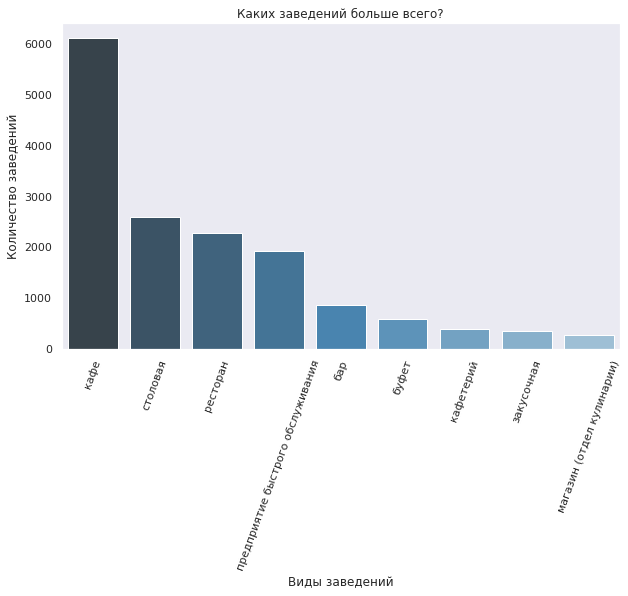

In [3]:
# gr - датафрейм для графика
#Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
gr_1 = rest.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="object_type", y="id", data=gr_1,  palette="Blues_d")
plt.title('Каких заведений больше всего?') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()



 - Большую часть рынка занимают кафе. Их значительно больше, чем остальных видов заведений общественного питания.
 - 2,3 и 4 место по популярности занимают: столовая, ресторан и фастфуд.
 - Меньше всего представленно отделов кулинарии в магазинах и закусочных.

### Распределение по типу ритейла

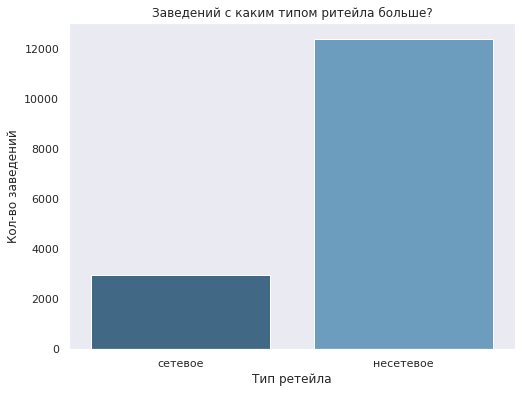

In [4]:
#Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

gr_2 = rest.pivot_table(columns='chain', values='id', aggfunc='count').rename(
    columns = {'да' : 'сетевое', 'нет' : 'несетевое'})

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=gr_2,  palette="Blues_d")
plt.title('Заведений с каким типом ритейла больше?') 
plt.xlabel('Тип ретейла')
plt.ylabel('Кол-во заведений')
plt.show()

- Среди заведений общественного питания Москвы значительную часть составляют несетевые места.
- Несетевых заведение почти в 4 раза больше, чем сетевых.

### Особенности сетевых заведений

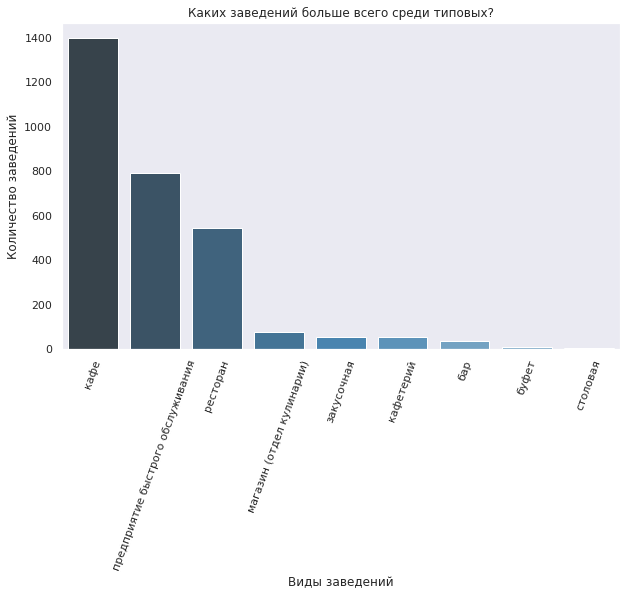

In [5]:
#Для какого вида объекта общественного питания характерно сетевое распространение?

gr_3 = rest.query('chain == "да"').pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="object_type", y="id", data=gr_3,  palette="Blues_d")
plt.title('Каких заведений больше всего среди типовых?') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()

- Среди сетевых так же больше всего представленно кафе
- Так же на рынке сетевых заведений общепита представлено много (2 и 3 пункты) точек фастфуда и ресторанов
- Среди сетевых предприятий почти отсутствуют столовые, меньше всего представлено буфетов и баров.

Исследуем соотношение количеста точек сети с их вмещаемостью (количеством посадочных мест).

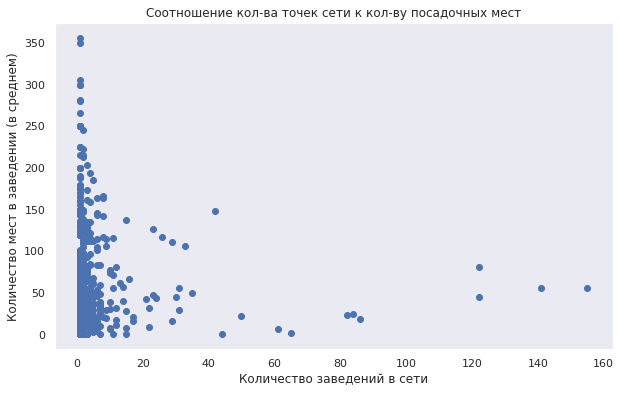

In [6]:
#Что характерно для сетевых заведений: соотношение кол-ва заведений и посадочных мест
gr_4 = rest.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'mean'})
#где id это кол-во точек заведений сети, а number - среднее кол-во посадочных мест в точке

plt.figure(figsize=(10, 6))
plt.scatter(x="id", y="number", data=gr_4)
plt.title('Соотношение кол-ва точек сети к кол-ву посадочных мест') 
plt.xlabel('Количество заведений в сети')
plt.ylabel('Количество мест в заведении (в среднем)')
plt.show()

Так как кафе - основной интересующий нас тип заведений, то посмотрим на это соотношение вместительности и распространенности сети для кофеен.

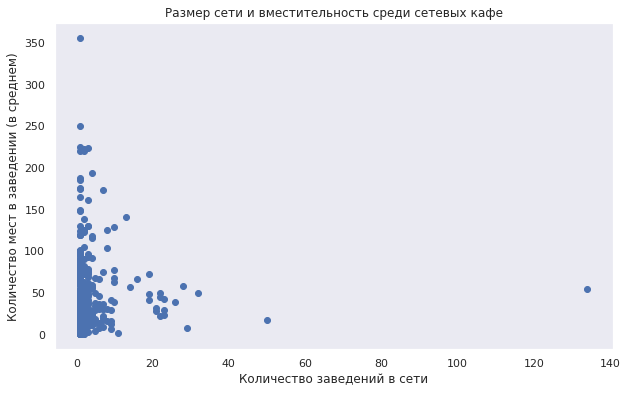

In [7]:
cafe = rest.query('object_type == "кафе" and chain == "да"')
cafe_1 = cafe.groupby('object_name').agg({'id':'count', 'number':'mean'})

plt.figure(figsize=(10, 6))
plt.scatter(x="id", y="number", data=cafe_1)
plt.title('Размер сети и вместительность среди сетевых кафе') 
plt.xlabel('Количество заведений в сети')
plt.ylabel('Количество мест в заведении (в среднем)')
plt.show()



In [8]:
print('Среднее кол-во посадочных мест для кафе',cafe['number'].mean().round())
print('Среднее кол-во точек в сети кафе', cafe_1['id'].mean())

Среднее кол-во посадочных мест для кафе 47.0
Среднее кол-во точек в сети кафе 3.2616822429906542


#### Cоотношение количеста точек сети с их вмещаемостью (количеством посадочных мест)

- Сетевые заведения в Москве чаще всего имеют до 20 точек. 
- Для большей части характерно количество посадочных мест до 100-150 человек. Больше уже более редкие случаи.
- В основном можно говорить, что чем меньше точек у заведения, тем большую вместительность заведения сети имеют. 
- Для "гигантов", имеющих более 20-ти точек по Москве характерна вместительность заведений не более 100 человек.

Для кафе:

- Для сетевых кафе с небольшой вместительностью (47 посадочных мест) каждой кофейни сеть в среднем от 3-4 до 20 точек.

**Примечание:**
Предварительно я оценила распределение посадочных мест по всем данным. Получилось меньше 1% очень больших (больше 1000) и 10% нулевых. Я оставила их в таблице и не стала отрезать, так как именно аномальными они мне не кажутся. Очень большие рестораны редко, но есть. Без посадочных мест бывают лотки, окошки на вынос и места в ТЦ, где на фудкорте места вроде как общие, а значит ничьи.

### Исследуем вмещаемость заведений общественного питания

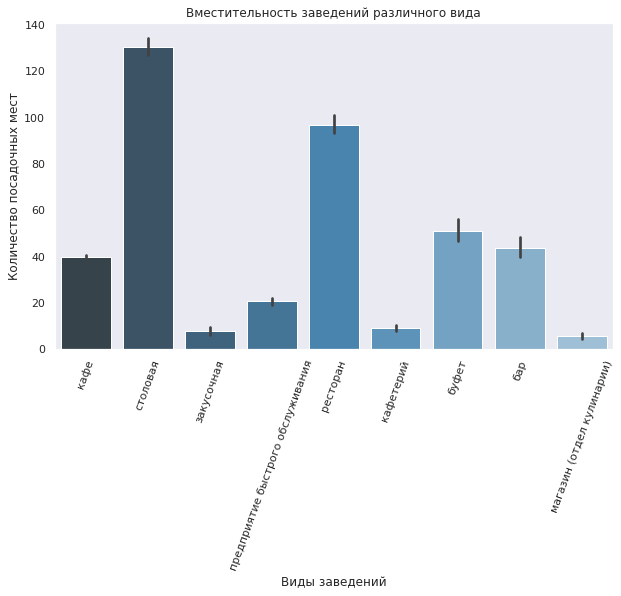

In [9]:
#Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. 
#Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

#rest_1.pivot_table(index='object_type', values = 'number').round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x='object_type', y='number', data=rest, palette="Blues_d");
plt.title('Вместительность заведений различного вида') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=70) 
plt.show()


- Наибольшая вместительность среди имеющихся заведений у столовых и ресторанов.
- У преобладающих на рынке видов заведений общественного питания (кафе и фастфуд) посадочных мест не так много, от 20 до 40. 
- Наименьшее количество посадочных мест предоставляют отделы кулинарии, кафетерии и закусочные


### Расположение заведений общественного питания

Для запуска удачного заведения общественного питания стоит найти удачное расположение. Предположим, что такие "удачные места" это улицы, на которых расположено больше всего точек общепита.
Найдем 10 наиболее загруженных улиц.

In [10]:
#Постройте график топ-10 улиц по количеству объектов общественного питания.
#Выделите в отдельный столбец информацию об улице из столбца address .
rest['street'] = rest['address'].str.split(',', expand=True)[1]
#методом проб и ошибок было выяснено, что в колонке с улицами в начале строки есть лишний пробел
rest['street'] = rest['street'].str.strip()
rest.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


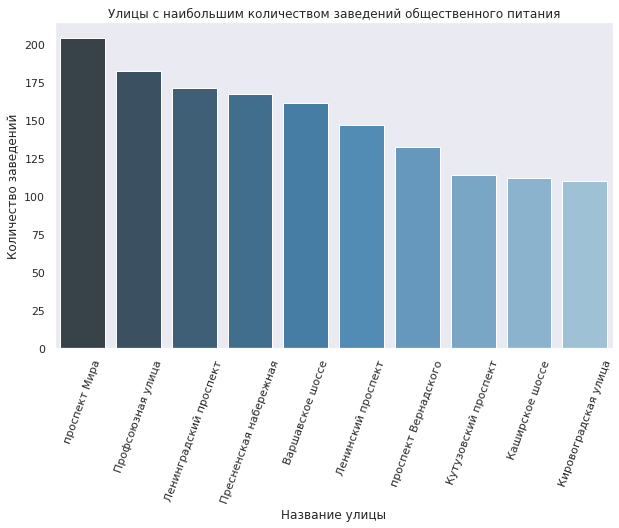

In [11]:
rest_street = rest.query('street != "город Зеленоград" and street != "поселение Сосенское"').groupby('street').agg(
    {'id':'count'}).sort_values(by='id', ascending=False)
top_10 = rest_street.head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='street', y='id' , data=top_10, palette="Blues_d");
plt.title('Улицы с наибольшим количеством заведений общественного питания') 
plt.xlabel('Название улицы')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()

- Большая часть улиц из топ-10 - шоссе и проспекты. Это дает довольно размытое представление о расположении "удачных" районов. 
- Оценим районы, в которых находятся улицы.

*Офтопик: я конечно понимаю, что это полезный опыт с внешними ресурсами, но вывод о том, что такой способ определения удачных районов не подходит можно сделать в принципе уже на этом этапе. Не до конца понимаю суть подключения районов..*

В качестве внешнего источника данных для определения районов использовалась таблица "Адресный реестр объектов недвижимости города Москвы" с сайта Портал открытых данных правительства Москвы.

https://data.mos.ru/datasets/60562

In [12]:
#Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
#https://docs.google.com/spreadsheets/d/1SsglWS93TLmyoe_PHeUOTZTyPrj7zI-NccEIz5nPYUQ/edit?usp=sharing

from io import BytesIO
import requests

#загрузим полученный из внешних данных регистр недвижимости москвы
spreadsheet_id = '1SsglWS93TLmyoe_PHeUOTZTyPrj7zI-NccEIz5nPYUQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
catalog = pd.read_csv(BytesIO(r.content))
catalog.head()


,address,area,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",Южный административный округ,муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Восточный административный округ,муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",Центральный административный округ,муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Восточный административный округ,муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Северный административный округ,муниципальный округ Сокол


In [13]:
# Объединим таблицы по адресу здания
rest_full = rest.merge(catalog, on = 'address', how='left') 
rest_full.head()

,id,object_name,chain,object_type,address,number,street,area,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Северо-Восточный административный округ,муниципальный округ Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN,NaN
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный административный округ,муниципальный округ Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Северо-Восточный административный округ,муниципальный округ Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Северо-Восточный административный округ,муниципальный округ Лианозово


In [14]:
# Соберем полную таблицу только из улиц, вошедших в топ-10
street_list = top_10['street']
top_full = rest_full.query('street in @street_list')

top_full.head()

,id,object_name,chain,object_type,address,number,street,area,district
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Южный административный округ,муниципальный округ Донской
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,Южный административный округ,муниципальный округ Донской
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,Южный административный округ,муниципальный округ Донской
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,Южный административный округ,муниципальный округ Нагорный
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,Южный административный округ,муниципальный округ Нагорный


In [15]:
pd.options.display.max_colwidth = 250
height_districts = top_full.groupby('street')['district'].apply(set)
height_districts

street
Варшавское шоссе          {муниципальный округ Чертаново Центральное, муниципальный округ Нагатино-Садовники, nan, муниципальный округ Чертаново Северное, муниципальный округ Южное Бутово, муниципальный округ Нагорный, муниципальный округ Донской, муниципальный округ Черт...
Каширское шоссе                                                                                  {муниципальный округ Москворечье-Сабурово, муниципальный округ Нагатино-Садовники, nan, муниципальный округ Орехово-Борисово Северное, муниципальный округ Орехово-Борисово Южное}
Кировоградская улица                                                                                                                                       {муниципальный округ Чертаново Центральное, муниципальный округ Чертаново Северное, муниципальный округ Чертаново Южное}
Кутузовский проспект                                                                                                                                                 

**Районы наиболее загруженных улиц**

- Улицы, попавшие в топ-10 очень длинные. Каждая из них попадает минимум в 5 районов.
- Некоторые улицы из топ_10 проходят через одинаковые районы

Этот способ анализа плохо подходит для определения "успешного района".
Попробуем оценить расположение улиц с самым маленьким количеством заведений общественного питания.

In [16]:
#Соберем таблицу с улицами с только одним заведением и узнаем количество таких улиц
low_street = rest_street.query('id == 1')
low_street.info()

#Добавим к этим улицам район
low_full = low_street.merge(rest_full, on='street')
del low_full['id_y']
#Сгруппируем по району и просуммируем количество "единичек". Таким образом мы узнаем, сколько "одиноких" улиц находится в этом районе.
#Выведем 10 районов с самым большим количеством "одиноких" улиц.
low_full.groupby('district').agg({'id_x':'sum'}).sort_values(by='id_x', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, Воротниковский переулок to Малая Андроньевская улица
Data columns (total 1 columns):
id    579 non-null int64
dtypes: int64(1)
memory usage: 9.0+ KB


,id_x
district,
муниципальный округ Таганский,27
муниципальный округ Хамовники,26
муниципальный округ Басманный,22
муниципальный округ Тверской,20
муниципальный округ Пресненский,19
муниципальный округ Марьина Роща,17
муниципальный округ Сокольники,14
муниципальный округ Лефортово,12
муниципальный округ Соколиная Гора,12


- Улиц, на которых всего одно заведение общественного питания 579. 
- Оценить районы, к которым прилегают эти улицы в виду их количества затруднительно. Сложим количество "неудачных улиц" для каждого района и посмотрим на 10 районов с наибольшим количеством улиц, на которых только одно заведение общепита.
- Районы, которые можно было бы считать неудачными для расположения заведения общественного питания на самом деле центральные районы Москвы: Хамовники, Басманный, Тверская... 

Эти районы не очень большие и на них много пустынных улиц. В тоже время, на других улицах этих районов по вечерам происходит шумный кутеж, днем в кафе обедают офисные работники, по утрам сидят студенты и завтракают гости столицы. 
Подобный метод анализа не подходит для выделения удачных для расположения районов.

### Вмещаемость заведений на самых загруженных улицах

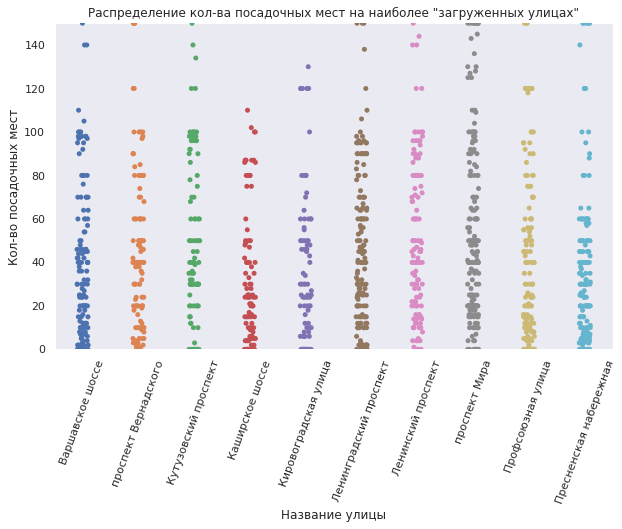

In [17]:
#Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 
plt.figure(figsize=(10, 6))
sns.stripplot(x="street", y="number", data=top_full)
plt.ylim(0, 150)
plt.title('Распределение кол-ва посадочных мест на наиболее "загруженных улицах"') 
plt.xlabel('Название улицы')
plt.ylabel('Кол-во посадочных мест')
plt.xticks(rotation=70) 
plt.show()

- Для улиц с наибольшим количеством заведений общепита распределение количества посадочных мест схожее:
  - плотнее всего график для количества мест 20-40. Эти значения характерны для кафе, а их, как мы знаем, больше всего, все логично
  - Значения становятся более разряженными после 100. Заведения с вместимостью более чем 100 человек встречаются довольно редко даже на улицах с наибольшим количеством заведений.

Вывод: Каждая из улиц, на которой собралось много заведений общественного питания по распределению посадочных мест в этих заведений не отличается от распределения, характерного для всех заведений Москвы в целом.

# Вывод

Презентация: <https://docs.google.com/presentation/d/1zmfPUD-oAK6iM0v2jefp2uHuV6sHSGU6UCAFvmbPiJY/edit?usp=sharing>


В работе мы анализировали рынок заведений общепита Москвы, отталкиваясь от вида, типа ретейла, вместительности и расположения, для того что бы оценить перспективы открытия кафе.

**Вид заведения**
 - Наибольшую часть московского рынка заведений общественного питания составляют кафе. Предположительно это популярный формат.
 - Так же достаточно много столовых, ресторанов и заведений быстрого питания. 
   - В данных имеется достаточно большое количество столовых, относящихся к школам и гимназиям. Так как учебных заведений в Москве много, то и таких столовых в таблице могло оказаться много. Вопрос со столовыми требует более детального анализа содержания данных.
 - Меньше всего в Москве кулинарий при универмагах, закусочных и кафетериев. Предположительно, этот формат сейчас не востребован.
 
 **Тип ритейла**
 
 
 - На рынке несетевых точек значительно больше, чем сетевых. 
 - Но при этом среди сетевых преобладают кафе, рестораны и заведения быстрого питания, являющиеся популярным форматом. 
 - Для сетевых заведений характерно в большинстве иметь небольшую сеть (в среднем около 20 точек) с небольшой вместительностью до 100/150 человек.
 - При сетевом ретейле с небольшой вместительностью (50 посадочных мест) каждой кофейни сеть в среднем от 3-4 до 20 точек.
 
 **Вместительность**
 
 
 - Наибольшая вместительность в среднем у столовых. Это может быть связано с наличием в данных школ (для которых необходима большая вместительность столовых).
 - У преобладающих на рынке кафе в среднем 40 посадочных мест. 
 - Для заведений быстрого питания в среднем количество посадочных мест 20.
 
**Расположение**
В работе мы отталкивались от изначальной идее, что наиболее благоприятное расположение для кафе стоит искать на улицах с наибольшим количеством точек общественного питания на ней.

- В топ-10 улиц попали преимущественно шоссе и проспекты. 
  - Это длинные улицы, проходящие через несколько районов. Это затрудняет выделение района или улицы для удачного расположения.
- Так же мы рассмотрели улицы, на которых открыто только одно заведение общественного питания.
  - Наибольшая часть таких улиц расположена в центральных районах Москвы, о которых исходя из бытовых знаний распологается много успешных заведений.
  - Часть районов "неуспешных" улиц пересекается с районами "успешных" улиц.

**Поиск удачной улицы или района при помощи анализа количества точек общественного питания представляется недостаточно действенным.** 

Для выделения удачного расположения в дальнейшем анализе стоит оценить:

- Плотность распределения точек общественного питания в различных районах
- Взаимосвязь плотности и "точек интереса" (метро, культурные объекты, офисные центры, спальные кварталы и т.д.)


## Рекомендации

- Наиболее востребованным на рынке формат заведения кафе
- Для сетевого распространения кафе подходит - большая доля сетевых заведений представлена именно форматом кафе
- Вместительность кафе в среднем часто бывает около 40 посадочных мест для одного заведения.
- При сетевом ритейле с небольшой вместительностью (50 посадочных мест) каждой кофейни сеть в среднем от 3-4 до 20 точек.
- Выбор наиболее удачного расположения требует дальнейшего анализа


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Итоговый комментарий</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Молодец! Ты справилась с этим проектом поздравляю! Сторитейлинг видимо твое призвание!
Работа сдела очень хорошо и добротно, но мне кажется тебе стоит побольше поработать над визацилазциями, некоторые графики были не совсем читаемыми - это я про "Соотношение кол-ва точек сети к кол-ву посадочных мест", исследуемые данные все-таки одномерные с категориальным разбиением, поэтом тут лучше ипользовать какой-нибудь из <a href=https://seaborn.pydata.org/generated/seaborn.catplot.html> категориальных графиков  </a>.

    
Если тебя интересует географическая визуализация (в презентации зачетная карта!) то восопльзуйся рекомендации в шаге с анализом распределения, можно получить интересную интерактивную карту прямо в тетрадке!
Выводы и презентация кстати на высоте! 
 
</div>

